In [48]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
import sys, importlib
import urllib
import numpy as np
import pandas as pd
import codecs
import csv
import pylab
from pandas import *
from pylab import *
import matplotlib.pyplot as plt
from datetime import date
import datetime
time = importlib.import_module('time')

In [30]:
url="http://real-chart.finance.yahoo.com/table.csv?s=AAPL&a=11&b=12&c=1981&d=07&e=6&f=2015&g=d&ignore=.csv"    
response = urllib.request.urlopen(url)
csvfile = csv.reader(codecs.iterdecode(response, 'utf-8'))


In [31]:
csvData=[]
for line in csvfile:
    csvData.append(line)

headers=csvData[0]
headers[6] = 'Adj_Close'

In [32]:
print(headers)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close']


In [33]:
tableData=[]
for i in range(len(csvData)-1,0,-1):
    tableData.append(csvData[i])

In [34]:
indexDates=[]
for i in range(0,len(tableData)):
    s=str(tableData[i][0])
    t=time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
    indexDates.append(time.asctime(time.localtime(t)))
    #tableData[i][0]=t

In [35]:
df = pd.DataFrame(tableData,columns=headers)
df=df.convert_objects(convert_numeric=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8486 entries, 0 to 8485
Data columns (total 7 columns):
Date         8486 non-null object
Open         8486 non-null float64
High         8486 non-null float64
Low          8486 non-null float64
Close        8486 non-null float64
Volume       8486 non-null int64
Adj_Close    8486 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 530.4+ KB


In [37]:
df.Date=indexDates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8486 entries, 0 to 8485
Data columns (total 7 columns):
Date         8486 non-null object
Open         8486 non-null float64
High         8486 non-null float64
Low          8486 non-null float64
Close        8486 non-null float64
Volume       8486 non-null int64
Adj_Close    8486 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 530.4+ KB


In [38]:
df.index=pd.to_datetime(df.Date)

In [39]:
df.index
df.pop('Date')

Date
1981-12-14    Mon Dec 14 00:00:00 1981
1981-12-15    Tue Dec 15 00:00:00 1981
1981-12-16    Wed Dec 16 00:00:00 1981
1981-12-17    Thu Dec 17 00:00:00 1981
1981-12-18    Fri Dec 18 00:00:00 1981
1981-12-21    Mon Dec 21 00:00:00 1981
1981-12-22    Tue Dec 22 00:00:00 1981
1981-12-23    Wed Dec 23 00:00:00 1981
1981-12-24    Thu Dec 24 00:00:00 1981
1981-12-28    Mon Dec 28 00:00:00 1981
1981-12-29    Tue Dec 29 00:00:00 1981
1981-12-30    Wed Dec 30 00:00:00 1981
1981-12-31    Thu Dec 31 00:00:00 1981
1982-01-04    Mon Jan  4 00:00:00 1982
1982-01-05    Tue Jan  5 00:00:00 1982
...
2015-07-17    Fri Jul 17 00:00:00 2015
2015-07-20    Mon Jul 20 00:00:00 2015
2015-07-21    Tue Jul 21 00:00:00 2015
2015-07-22    Wed Jul 22 00:00:00 2015
2015-07-23    Thu Jul 23 00:00:00 2015
2015-07-24    Fri Jul 24 00:00:00 2015
2015-07-27    Mon Jul 27 00:00:00 2015
2015-07-28    Tue Jul 28 00:00:00 2015
2015-07-29    Wed Jul 29 00:00:00 2015
2015-07-30    Thu Jul 30 00:00:00 2015
2015-07-31    Fr

In [40]:
df

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
1981-12-14,18.374720,18.374720,18.124959,18.124959,6311200,0.276260
1981-12-15,18.625041,18.749920,18.625041,18.625041,7828800,0.283883
1981-12-16,19.499760,19.625201,19.499760,19.499760,16363200,0.297215
1981-12-17,21.124879,21.249760,21.124879,21.124879,12863200,0.321985
1981-12-18,22.874879,22.999760,22.874879,22.874879,17931200,0.348658
1981-12-21,22.000160,22.000160,21.874720,21.874720,14100800,0.333414
1981-12-22,22.249920,22.374799,22.249920,22.249920,13456800,0.339133
1981-12-23,21.874720,21.874720,21.749840,21.749840,7224000,0.331511
1981-12-24,21.874720,22.000160,21.874720,21.874720,7229600,0.333414


In [41]:
#All Daily Closing Prices for 2015
df.Close['2015']

Date
2015-01-02    109.330002
2015-01-05    106.250000
2015-01-06    106.260002
2015-01-07    107.750000
2015-01-08    111.889999
2015-01-09    112.010002
2015-01-12    109.250000
2015-01-13    110.220001
2015-01-14    109.800003
2015-01-15    106.820000
2015-01-16    105.989998
2015-01-20    108.720001
2015-01-21    109.550003
2015-01-22    112.400002
2015-01-23    112.980003
...
2015-07-17    129.619995
2015-07-20    132.070007
2015-07-21    130.750000
2015-07-22    125.220001
2015-07-23    125.160004
2015-07-24    124.500000
2015-07-27    122.769997
2015-07-28    123.379997
2015-07-29    122.989998
2015-07-30    122.370003
2015-07-31    121.300003
2015-08-03    118.440002
2015-08-04    114.639999
2015-08-05    115.400002
2015-08-06    115.129997
Name: Close, Length: 150

In [42]:
close2015 = df.Close['2015']
close2015.shift(1)/close2015 - 1

Date
2015-01-02         NaN
2015-01-05    0.028988
2015-01-06   -0.000094
2015-01-07   -0.013828
2015-01-08   -0.037001
2015-01-09   -0.001071
2015-01-12    0.025263
2015-01-13   -0.008801
2015-01-14    0.003825
2015-01-15    0.027897
2015-01-16    0.007831
2015-01-20   -0.025110
2015-01-21   -0.007576
2015-01-22   -0.025356
2015-01-23   -0.005134
...
2015-07-17   -0.008563
2015-07-20   -0.018551
2015-07-21    0.010096
2015-07-22    0.044162
2015-07-23    0.000479
2015-07-24    0.005301
2015-07-27    0.014091
2015-07-28   -0.004944
2015-07-29    0.003171
2015-07-30    0.005067
2015-07-31    0.008821
2015-08-03    0.024147
2015-08-04    0.033147
2015-08-05   -0.006586
2015-08-06    0.002345
Name: Close, Length: 150

In [43]:
#Adding Columns for plotting
df['MAvg'] = pd.rolling_mean(df.Adj_Close,30)
df['SDev'] = pd.rolling_std(df.Adj_Close,30)
df['lower_band'] = df.MAvg - 2*df.SDev
df['higher_band'] = df.MAvg + 2*df.SDev
df['alert'] = np.where((df.Adj_Close > df.higher_band) | (df.Adj_Close < df.lower_band), True,False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8486 entries, 1981-12-14 00:00:00 to 2015-08-06 00:00:00
Data columns (total 11 columns):
Open           8486 non-null float64
High           8486 non-null float64
Low            8486 non-null float64
Close          8486 non-null float64
Volume         8486 non-null int64
Adj_Close      8486 non-null float64
MAvg           8457 non-null float64
SDev           8457 non-null float64
lower_band     8457 non-null float64
higher_band    8457 non-null float64
alert          8486 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 737.6 KB


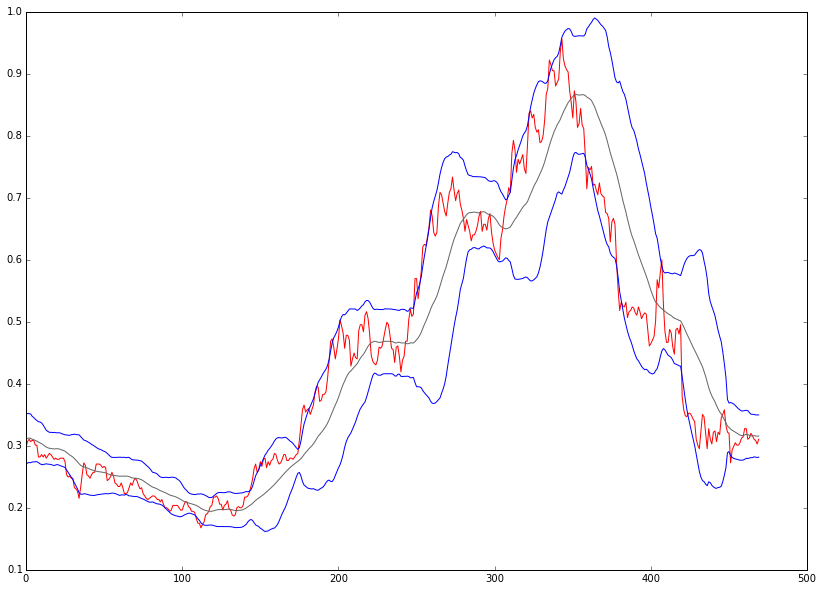

In [57]:
rows = range(30,500)
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.ix[rows].Adj_Close,linewidth = 1, color = 'red', linestyle = '-')
plt.plot(df.ix[rows].MAvg, color = '0.40', linestyle = '-')
plt.plot(df.ix[rows].lower_band, color = 'blue', linestyle = '-')
plt.plot(df.ix[rows].higher_band,color = 'blue', linestyle = '-')
plt.show()